In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

# Specify the file path of your CSV file
file_path = "/home/users/elicina/Master-Thesis/Diagrams/ML-Results/TF/misclassified_tickets_SVM_Real.csv"

# Read the CSV file into a DataFrame
df_clean = pd.read_csv(file_path)

df_clean.head(5)

,Text,True Label,Predicted Label,Real Category,Subcategory,Original Raw Text
0,submit complaint bank continue deny aplication...,2,1,Bank Account or Service,Checking or savings account,I am submitting this complaint because this ba...
1,concern unable aply bank acount typeof financi...,0,1,Credit Reporting and Debt Collection,"Credit reporting, credit repair services, or o...",To whom it may concern i am unable to apply fo...
2,sem want create chase acount online website re...,0,1,Credit Reporting and Debt Collection,"Credit reporting, credit repair services, or o...",It 's seems like someone wanted to create a ch...
3,type colection case number filing date case st...,0,1,Credit Reporting and Debt Collection,Debt collection,XXXX ( XXXX XXXX country ) XXXX XXXX XXXX vs X...
4,victim identity theft steal information preten...,0,2,Credit Reporting and Debt Collection,"Credit reporting, credit repair services, or o...","I AM VICTIM OF AN IDENTITY THEFT, SOMEONE STOL..."


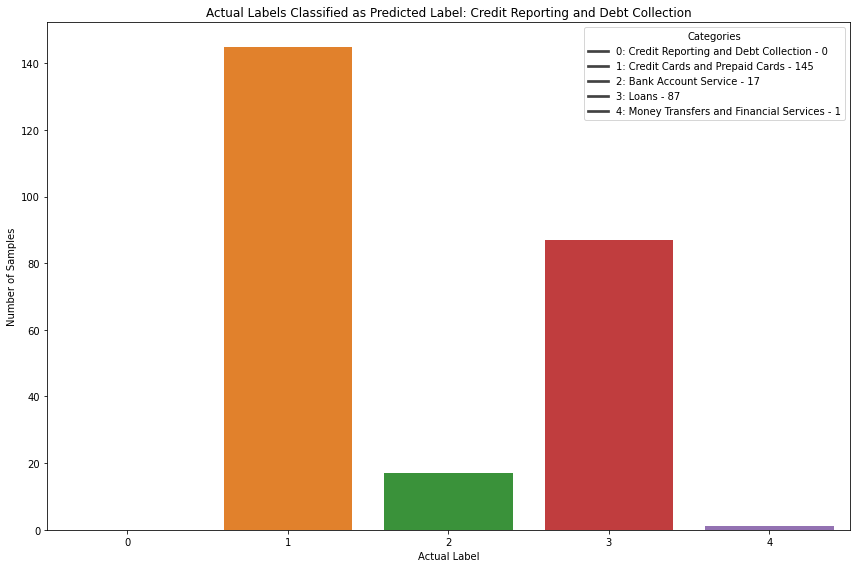

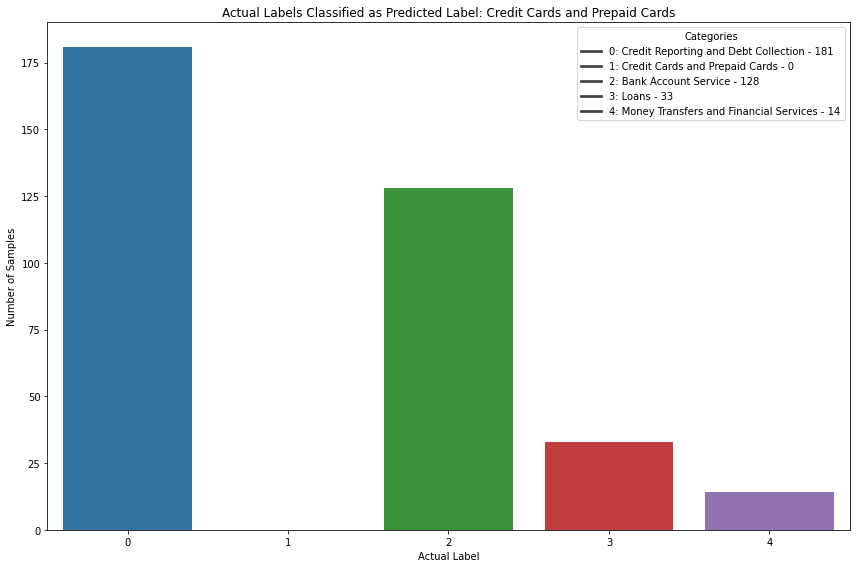

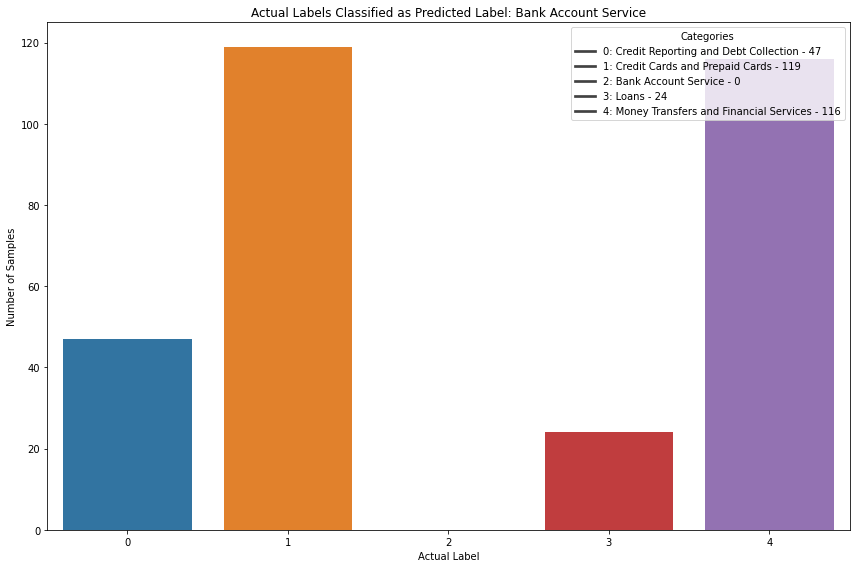

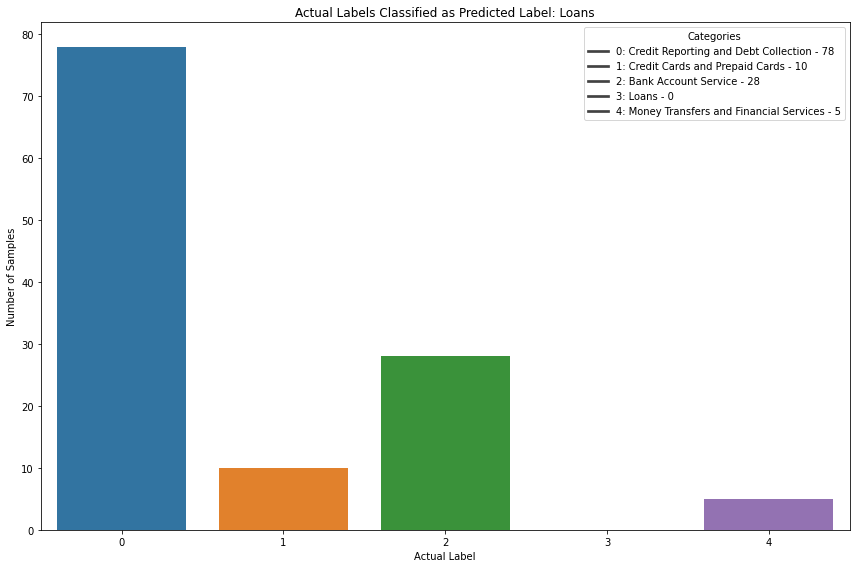

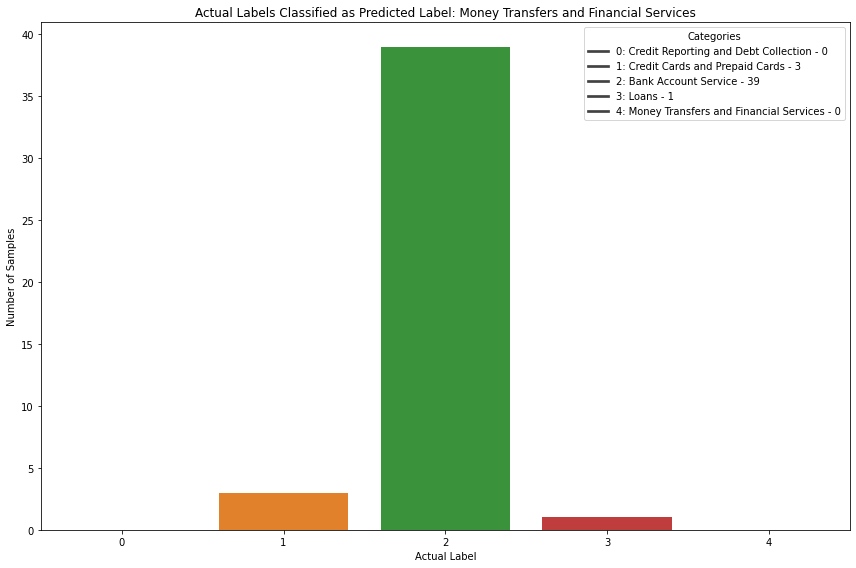

In [3]:
crosstab = pd.crosstab(df_clean['Predicted Label'], df_clean['True Label'])

def get_category_name(label):
    # Assuming you have a dictionary mapping labels to category names
    label_to_category = {
        0: 'Credit Reporting and Debt Collection',
        1: 'Credit Cards and Prepaid Cards',
        2: 'Bank Account Service',
        3: "Loans",
        4: "Money Transfers and Financial Services"
        # Add all your label mappings here
    }
    return label_to_category.get(label, 'Unknown Category')


# Plot the diagrams for each predicted label
for predicted_label in crosstab.index:
    category_name = get_category_name(predicted_label)
    plt.figure(figsize=(12, 8))
    
    # Create a bar plot
    sns.barplot(x=crosstab.columns, y=crosstab.loc[predicted_label].values)
    plt.title(f'Actual Labels Classified as Predicted Label: {category_name}')
    plt.xlabel('Actual Label')
    plt.ylabel('Number of Samples')
    plt.xticks(rotation=0)
    
    # Create legend entries
    legend_entries = {f'{label}: {get_category_name(label)}': count for label, count in crosstab.loc[predicted_label].items()}
    
    # Add the legend
    plt.legend(title='Categories', labels=[f'{entry} - {count}' for entry, count in legend_entries.items()], loc='upper right')
    
    plt.tight_layout()
    plt.show()



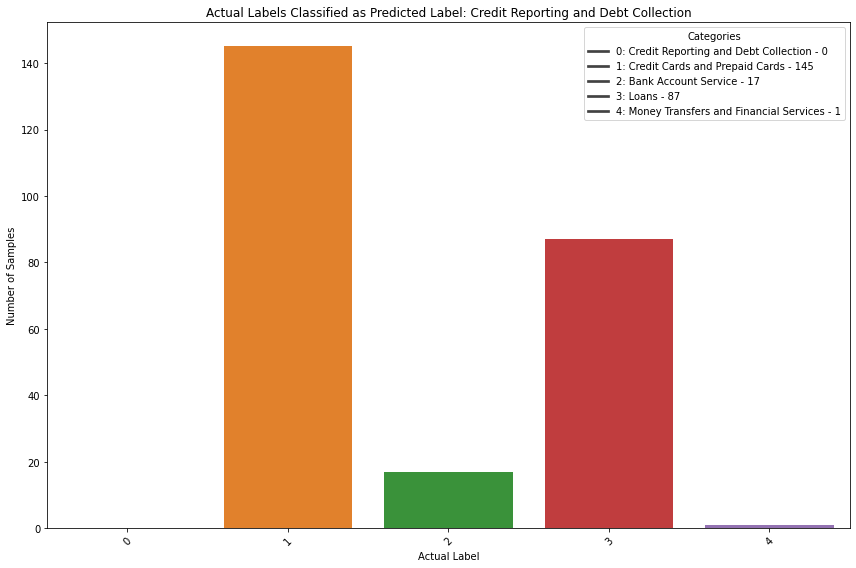


Examples for Predicted Label: Credit Reporting and Debt Collection

Example:
True Label: Credit Cards and Prepaid Cards
True Sublabel: Credit card or prepaid card
Predicted Label: Credit Reporting and Debt Collection
Text: chase ink credit card smal busine open fel monthly payment chase suspend acount increase interest authorized person busine credit card acount reach oral setlement agrement chase outline leter send chase ofice confirm outline setlement agrement ofice timely payment setlement agrement chase update acount status pay history agre setle acount status curent pay history month    enter setlement agrement base understanding chase perform corection credit reporting acount afect busine personal credit oportunitie atempte corect isue chase suce anticipation aplye home mortgage pre qualification reach chase request corect incorect derogatory credit reporting isue chase respond update payment status day breach setlement agrement lower credit score update pay history reflect nega

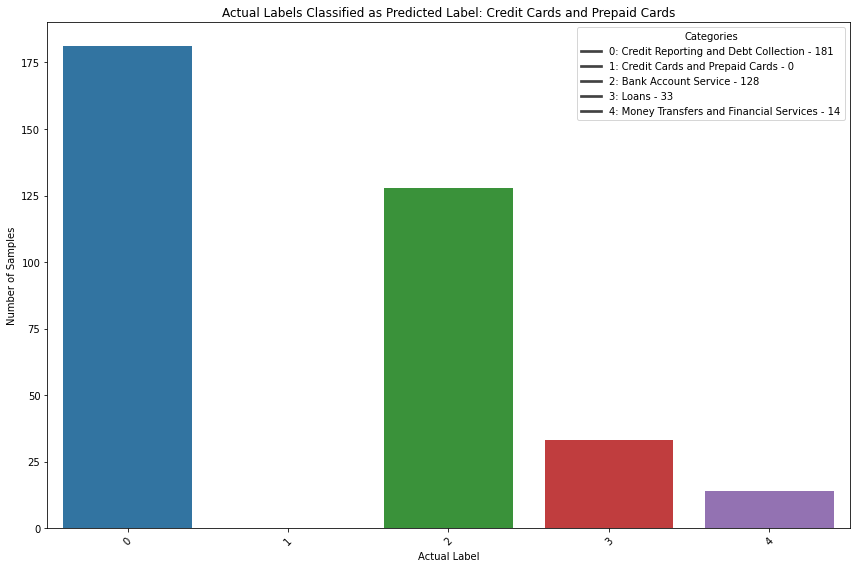


Examples for Predicted Label: Credit Cards and Prepaid Cards

Example:
True Label: Credit Reporting and Debt Collection
True Sublabel: Credit reporting, credit repair services, or other personal consumer reports
Predicted Label: Credit Cards and Prepaid Cards
Text: concern unable aply bank acount typeof financial service credit score low dude acount unknown use fel acounte report help
Raw Text: To whom it may concern i am unable to apply for bank accounts are any typeof financial service to to my credit score being lower dude to accounts unknown are not to my use i feel like its unfairly accounted and i did not do anything on my report i need help
--------------------------------------------------------------------------------

Example:
True Label: Bank Account Service
True Sublabel: Checking or savings account
Predicted Label: Credit Cards and Prepaid Cards
Text: submit complaint bank continue deny aplication time check year shut single chase   credit card inquiry try open chase   ca

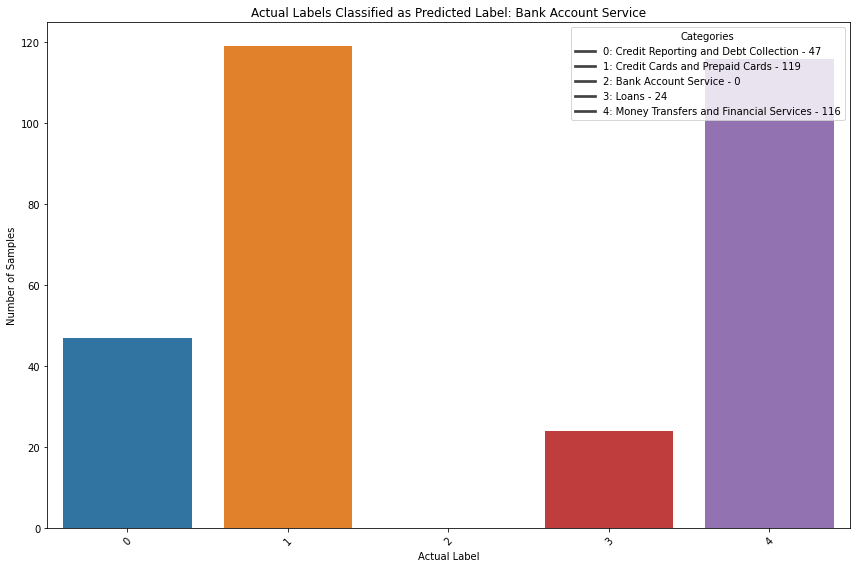


Examples for Predicted Label: Bank Account Service

Example:
True Label: Credit Cards and Prepaid Cards
True Sublabel: Credit card or prepaid card
Predicted Label: Bank Account Service
Text: bank fes stop payment problem cancel   agrement month acepte charge couple time date date talk time helpful try conversation prof scare charge charge customer bad waste time ask questione end talk time use acount net mounth charge charge ne stop payment chase bank acount want stop insuficent dolar want block payment solution replacement cart waste time money fraude chase stop suporte case bank acount number email
Raw Text: Chase Bank fees and stop XXXX payment I have a problem with XXXX.I cancelled my XXXX agremment two month ago and they accepted it.But they charged me a couple time ( Date:XX/XX/2019 {$12.00} / Date:XX/XX/2019 {$15.00} ) .I ve talked XXXX more than ten times but they are not helpful, I tried to get my conversation more than last one as a proof but i am scaring to charged me again

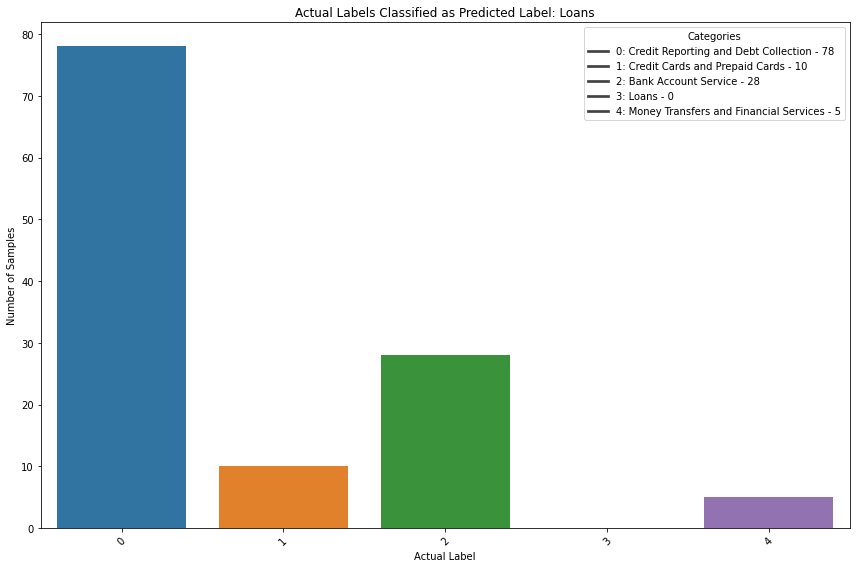


Examples for Predicted Label: Loans

Example:
True Label: Credit Reporting and Debt Collection
True Sublabel: Credit reporting, credit repair services, or other personal consumer reports
Predicted Label: Loans
Text: concern chase mortgage customer curent customer bank saving acount credit card   cale mortgage payment speak lady phone ask acount information order proce tok info procese request mortgage lender pule credit suplement prove mortgage payment pay procese find reject payment tok incorect acount number information cale multiple time reach leave voice mail multiple solicitation car insurance company pick cal wasn aware number find fund acount cale figure eplain situation payment report day credit kile refinance atempte payment time writen corespondence isue receive voice mail payment isue aset acount mention cal record pule cal want hear cal know lady information request claim check number acount number lady ask entire number help covid pandemic hold refinance help situation he

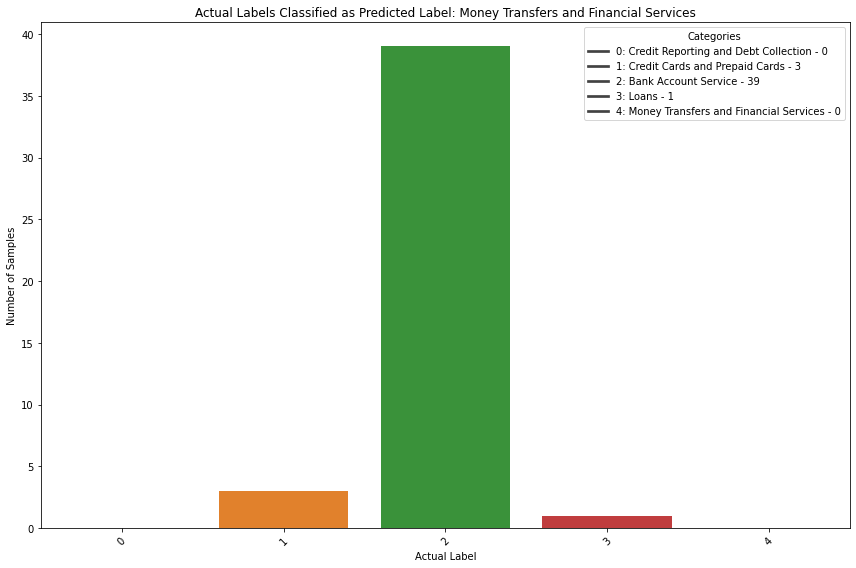


Examples for Predicted Label: Money Transfers and Financial Services

Example:
True Label: Bank Account Service
True Sublabel: Checking or savings account
Predicted Label: Money Transfers and Financial Services
Text: chase private banking client chase saphire check acount yesterday family use wire transfer transfer chase saphire check acount chase saphire check acount chase policy wire transfer outgoing incoming wire transfer meantime family pay wire transfer fes bank initiate wire transfer receive chase checking acount deposit chase check acount wire transfer chase charge incoming wire transfer family inquire bank tell wire transfer receive bank confirm mising charge chase receive bank report isue chase private client customer service representative treat resolve isue disapointed chase bank customer service escalate isue cfpb request chase post chase saphire check acount chase charge
Raw Text: I am a Chase private banking client with Chase Sapphire checking account. Yesterday my fami

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Adjust pandas display settings for full text visibility
pd.set_option('display.max_colwidth', None)  # None to display full text

# Specify the file path of your misclassified tickets CSV file
misclassified_file_path = "/home/users/elicina/Master-Thesis/Diagrams/ML-Results/TF/misclassified_tickets_SVM_Real.csv"

# Read the misclassified tickets CSV file into a DataFrame
df_misclassified = pd.read_csv(misclassified_file_path)

# Compute the crosstab
crosstab = pd.crosstab(df_misclassified['Predicted Label'], df_misclassified['True Label'])

# Define a function to get the category name
def get_category_name(label):
    label_to_category = {
        0: 'Credit Reporting and Debt Collection',
        1: 'Credit Cards and Prepaid Cards',
        2: 'Bank Account Service',
        3: 'Loans',
        4: 'Money Transfers and Financial Services'
        # Add all your label mappings here
    }
    return label_to_category.get(label, 'Unknown Category')

# Function to get one example of each highest actual value
def get_one_example(predicted_label, top_labels):
    examples = []
    for actual_label in top_labels:
        example = df_misclassified[(df_misclassified['Predicted Label'] == predicted_label) & 
                                   (df_misclassified['True Label'] == actual_label)]
        if not example.empty:
            examples.append(example.head(1))
    return examples

# Plot the diagrams for each predicted label
for predicted_label in crosstab.index:
    category_name = get_category_name(predicted_label)
    plt.figure(figsize=(12, 8))
    
    # Plot bar chart
    counts = crosstab.loc[predicted_label]
    sns.barplot(x=counts.index, y=counts.values)
    
    plt.title(f'Actual Labels Classified as Predicted Label: {category_name}')
    plt.xlabel('Actual Label')
    plt.ylabel('Number of Samples')
    plt.xticks(rotation=45)
    
    # Create legend entries
    legend_entries = {f'{label}: {get_category_name(label)}': count for label, count in counts.items()}
    
    # Add the legend
    plt.legend(title='Categories', labels=[f'{entry} - {count}' for entry, count in legend_entries.items()], loc='upper right')

    # Show the plot
    plt.tight_layout()
    plt.show()

    # Print one example of each highest actual value
    top_labels = counts.nlargest(2).index
    examples = get_one_example(predicted_label, top_labels)
    print(f'\nExamples for Predicted Label: {category_name}')
    for example in examples:
        print("\nExample:")
        print(f"True Label: {get_category_name(example['True Label'].values[0])}")
        print(f"True Sublabel: {example['Subcategory'].values[0]}")
        print(f"Predicted Label: {get_category_name(example['Predicted Label'].values[0])}")
        print(f"Text: {example['Text'].values[0]}")
        print(f"Raw Text: {example['Original Raw Text'].values[0]}")
        print("-" * 80)  # Separator for readability
